In [15]:
import numpy as np
import quantities as pq
import elephant
from elephant.statistics import isi
#import vizi
#import misc
import matplotlib
import matplotlib.pyplot as plt
import neo
import seaborn as sns
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = [16, 12]
sns.set(font_scale=1.5)

from sklearn.decomposition import PCA
from scipy import stats
import matplotlib.colors as colors

In [2]:
data1 = np.load('data/data1.npy')
data2 = np.load('data/data2.npy')
data3 = np.load('data/data3.npy')
data4 = np.load('data/data4.npy')
data5 = np.load('data/data5.npy')
data6 = np.load('data/data6.npy')

In [3]:
def ProcessData(dataInput):
    data = np.array([])
    for i, d in enumerate(dataInput):
        data = np.append(data, d.magnitude)
    bins = np.arange(0., 200., .2)
    rate = np.histogram(data, bins=bins)[0]
    return rate

def GenerateEmbedding(rate, tau, size):
    Embedding = np.array([rate[:-9:tau], rate[1:-8:tau], rate[2:-7:tau], rate[3:-6:tau], rate[4:-5:tau],
                          rate[5:-4:tau], rate[6:-3:tau], rate[7:-2:tau], rate[8:-1:tau], rate[9::tau]])
    return Embedding[:size]

In [4]:
rate1 = ProcessData(data1)
rate2 = ProcessData(data2)
rate3 = ProcessData(data3)
rate4 = ProcessData(data4)
rate5 = ProcessData(data5)
rate6 = ProcessData(data6)


rate1 = (rate1 - np.mean(rate1)) / np.std(rate1)
rate2 = (rate2 - np.mean(rate2)) / np.std(rate2)
rate3 = (rate3 - np.mean(rate3)) / np.std(rate3)
rate4 = (rate4 - np.mean(rate4)) / np.std(rate4)
rate5 = (rate5 - np.mean(rate5)) / np.std(rate5)
rate6 = (rate6 - np.mean(rate6)) / np.std(rate6)

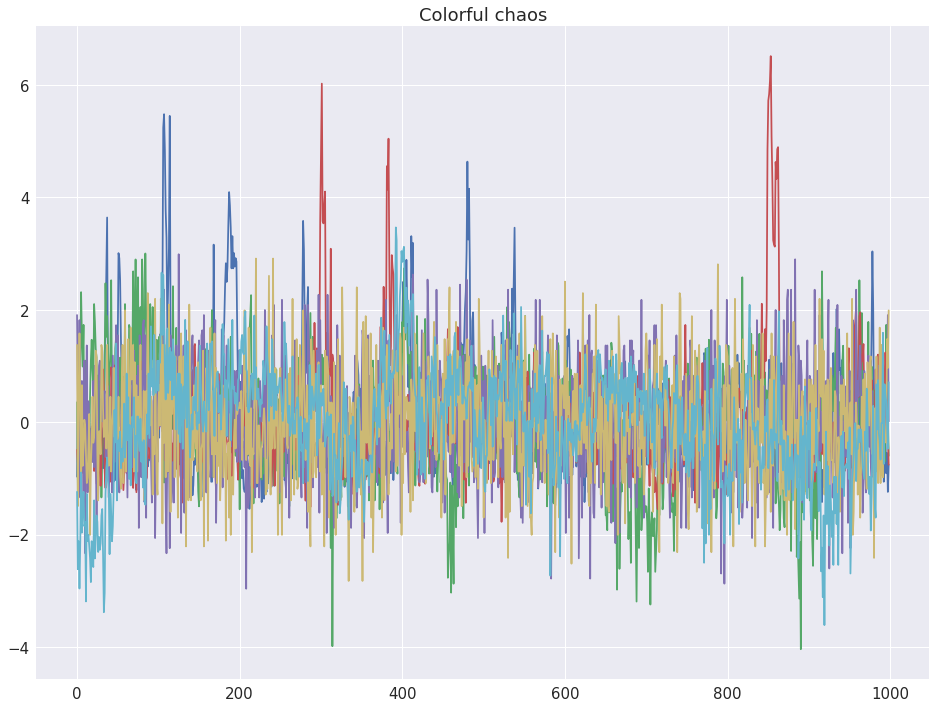

In [39]:
plt.clf()
plt.plot(rate1)
plt.plot(rate2)
plt.plot(rate3)
plt.plot(rate4)
plt.plot(rate5)
plt.plot(rate6)
plt.title('Colorful chaos')
plt.savefig('rates_for_embeddings.png')
plt.show()


In [6]:
size=10
tau = 2

x1 = GenerateEmbedding(rate1, tau, size)
x2 = GenerateEmbedding(rate2, tau, size)
x3 = GenerateEmbedding(rate3, tau, size)
x4 = GenerateEmbedding(rate4, tau, size)
x5 = GenerateEmbedding(rate5, tau, size)
x6 = GenerateEmbedding(rate6, tau, size)

<Figure size 1152x864 with 0 Axes>

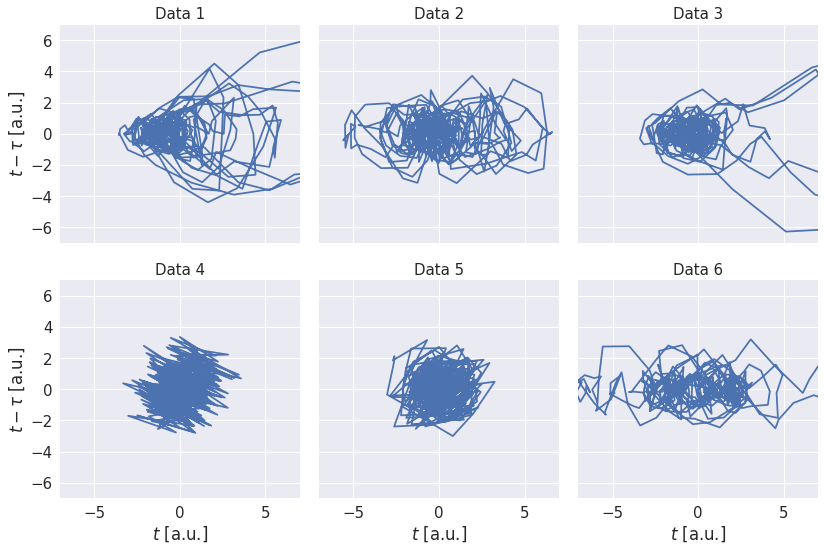

In [41]:
plt.clf()
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='col', sharey='row', figsize=(12,8))
ax1.plot(x1[0], x1[1])
ax2.plot(x2[0], x2[1])
ax3.plot(x3[0], x3[1])
ax4.plot(x4[0], x4[1])
ax5.plot(x5[0], x5[1])
ax6.plot(x6[0], x6[1])

lim_value = 7

ax1.set_xlim(-lim_value,lim_value)
ax2.set_xlim(-lim_value,lim_value)
ax3.set_xlim(-lim_value,lim_value)
ax1.set_ylim(-lim_value,lim_value)
ax2.set_ylim(-lim_value,lim_value)
ax5.set_ylim(-lim_value,lim_value)

ax1.set_title('Data 1', fontsize=15)
ax2.set_title('Data 2', fontsize=15)
ax3.set_title('Data 3', fontsize=15)
ax4.set_title('Data 4', fontsize=15)
ax5.set_title('Data 5', fontsize=15)
ax6.set_title('Data 6', fontsize=15)

ax1.set_ylabel(r'$t-\tau$ [a.u.]')
ax4.set_ylabel(r'$t-\tau$ [a.u.]')
ax4.set_xlabel(r'$t$ [a.u.]')
ax5.set_xlabel(r'$t$ [a.u.]')
ax6.set_xlabel(r'$t$ [a.u.]')
plt.tight_layout()
plt.savefig('embeddings.png')
plt.show()

In [8]:
pca1 = PCA()
pca1.fit(x1.T)
x1 = pca1.transform(x1.T).T

pca2 = PCA()
pca2.fit(x2.T)
x2 = pca2.transform(x2.T).T

pca3 = PCA()
pca3.fit(x3.T)
x3 = pca3.transform(x3.T).T

pca4 = PCA()
pca4.fit(x4.T)
x4 = pca4.transform(x4.T).T

pca5 = PCA()
pca5.fit(x5.T)
x5 = pca5.transform(x5.T).T

pca6 = PCA()
pca6.fit(x6.T)
x6 = pca6.transform(x6.T).T

<Figure size 1152x864 with 0 Axes>

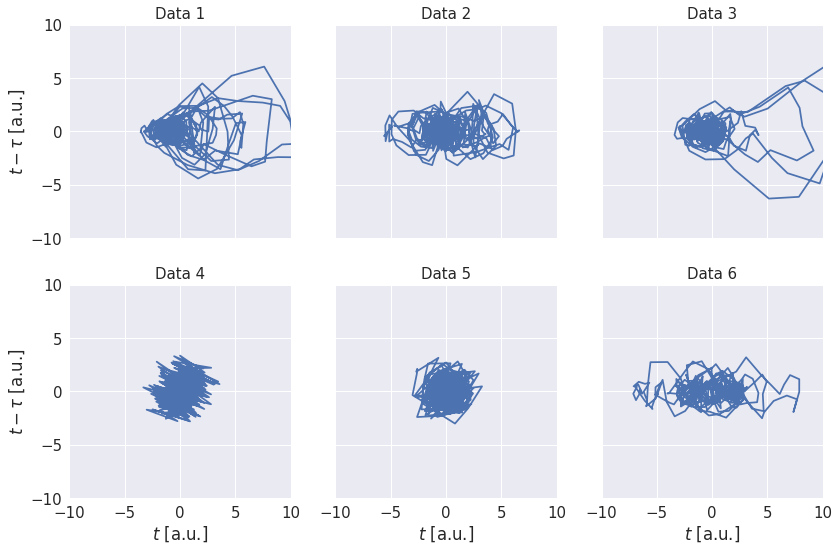

In [37]:
plt.clf()
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='col', sharey='row', figsize=(12,8))
ax1.plot(x1[0], x1[1])
ax2.plot(x2[0], x2[1])
ax3.plot(x3[0], x3[1])
ax4.plot(x4[0], x4[1])
ax5.plot(x5[0], x5[1])
ax6.plot(x6[0], x6[1])

lim_value = 10

ax1.set_xlim(-lim_value,lim_value)
ax2.set_xlim(-lim_value,lim_value)
ax3.set_xlim(-lim_value,lim_value)
ax1.set_ylim(-lim_value,lim_value)
ax2.set_ylim(-lim_value,lim_value)
ax5.set_ylim(-lim_value,lim_value)

ax1.set_title('Data 1', fontsize=15)
ax2.set_title('Data 2', fontsize=15)
ax3.set_title('Data 3', fontsize=15)
ax4.set_title('Data 4', fontsize=15)
ax5.set_title('Data 5', fontsize=15)
ax6.set_title('Data 6', fontsize=15)

ax1.set_ylabel(r'$t-\tau$ [a.u.]')
ax4.set_ylabel(r'$t-\tau$ [a.u.]')
ax4.set_xlabel(r'$t$ [a.u.]')
ax5.set_xlabel(r'$t$ [a.u.]')
ax6.set_xlabel(r'$t$ [a.u.]')
plt.tight_layout()
plt.savefig('pca_of_embeddings.png')
plt.show()

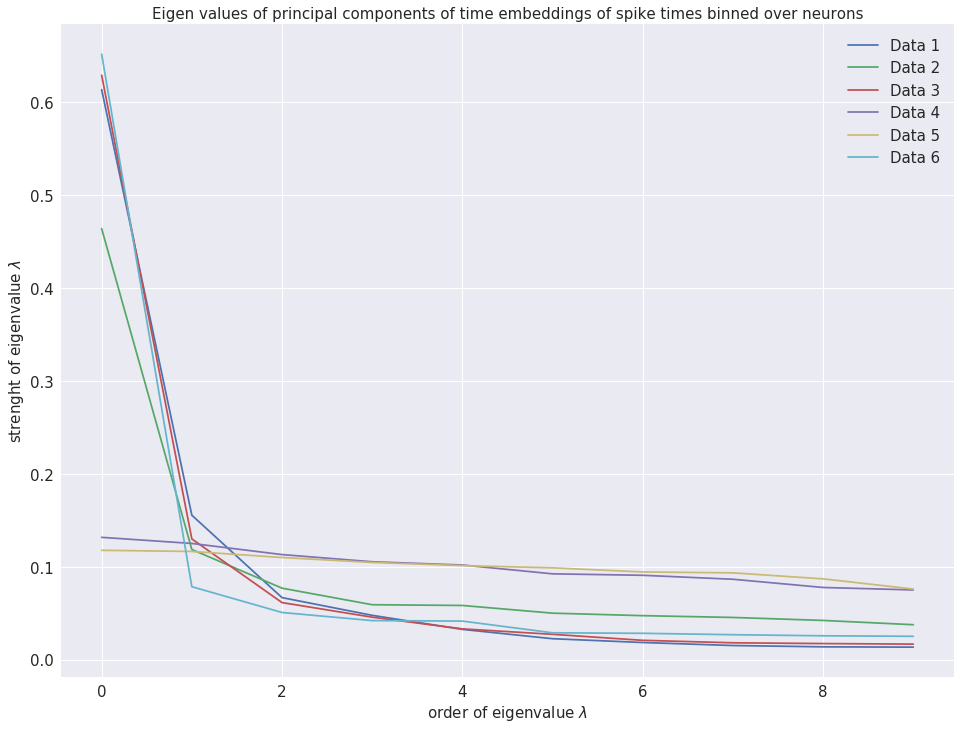

In [35]:
plt.clf()
plt.plot(pca1.explained_variance_/np.sum(pca1.explained_variance_), label='Data 1')
plt.plot(pca2.explained_variance_/np.sum(pca2.explained_variance_), label='Data 2')
plt.plot(pca3.explained_variance_/np.sum(pca3.explained_variance_), label='Data 3')
plt.plot(pca4.explained_variance_/np.sum(pca4.explained_variance_), label='Data 4')
plt.plot(pca5.explained_variance_/np.sum(pca5.explained_variance_), label='Data 5')
plt.plot(pca6.explained_variance_/np.sum(pca6.explained_variance_), label='Data 6')
plt.xlabel('order of eigenvalue $\lambda$', fontsize=15)
plt.ylabel('strenght of eigenvalue $\lambda$', fontsize=15)
plt.legend(loc='best', fontsize=15)
plt.title('Eigen values of principal components of time embeddings of spike times binned over neurons', fontsize=15)
plt.savefig('pca_eigenvalues.png')

(0, 0, 1.0)
(0, 1, 0.031046781145641363)
(0, 2, 0.6750781537165953)
(0, 3, 0.0012162112998959323)
(0, 4, 0.0012162112998959323)
(0, 5, 0.11084033741322809)
(1, 0, 0.031046781145641363)
(1, 1, 1.0)
(1, 2, 0.031046781145641363)
(1, 3, 0.006898647100946122)
(1, 4, 0.006898647100946122)
(1, 5, 0.031046781145641363)
(2, 0, 0.6750781537165953)
(2, 1, 0.031046781145641363)
(2, 2, 1.0)
(2, 3, 0.0012162112998959323)
(2, 4, 0.0012162112998959323)
(2, 5, 0.3128526760169558)
(3, 0, 0.0012162112998959323)
(3, 1, 0.006898647100946122)
(3, 2, 0.0012162112998959323)
(3, 3, 1.0)
(3, 4, 0.6750781537165953)
(3, 5, 0.0012162112998959323)
(4, 0, 0.0012162112998959323)
(4, 1, 0.006898647100946122)
(4, 2, 0.0012162112998959323)
(4, 3, 0.6750781537165953)
(4, 4, 1.0)
(4, 5, 0.0012162112998959323)
(5, 0, 0.11084033741322809)
(5, 1, 0.031046781145641363)
(5, 2, 0.3128526760169558)
(5, 3, 0.0012162112998959323)
(5, 4, 0.0012162112998959323)
(5, 5, 1.0)


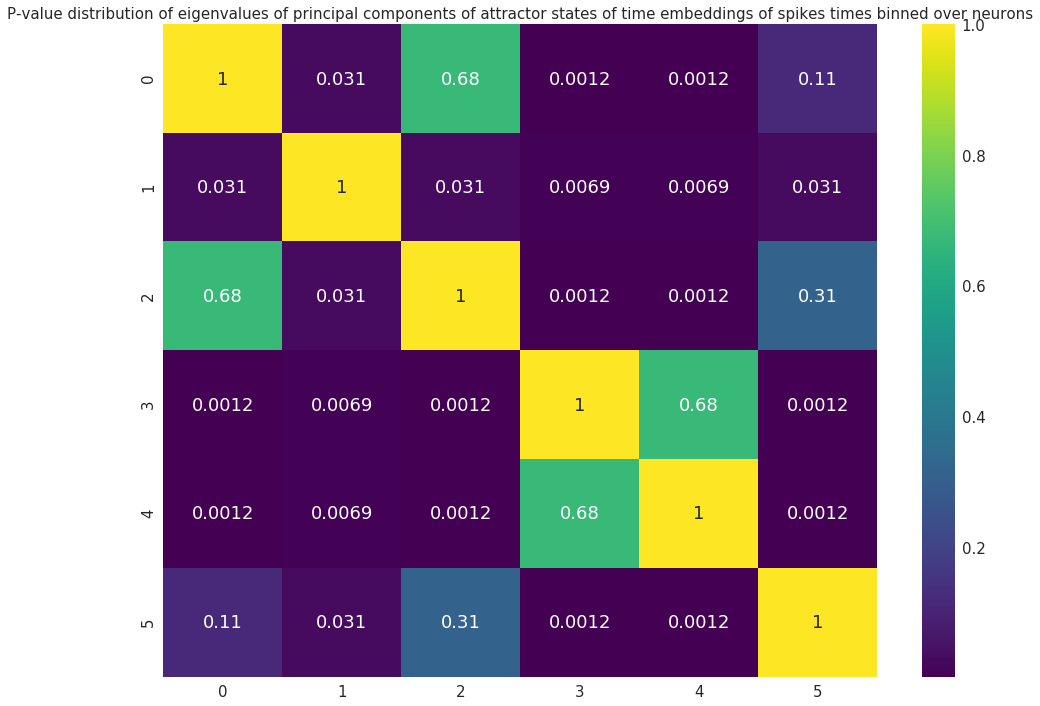

In [36]:
dists = [pca1.explained_variance_,pca2.explained_variance_,pca3.explained_variance_,
         pca4.explained_variance_,pca5.explained_variance_,pca6.explained_variance_]

Res = np.zeros((len(dists), len(dists)))
for i in range(len(dists)):
    for j in range(len(dists)):
        Res[i,j] = stats.ks_2samp(dists[i], dists[j])[1]
        print(i,j,Res[i,j])

plt.clf()
sns.set(font_scale=1.5)
sns.heatmap(Res, annot=True, cmap='viridis')
plt.title('P-value distribution of eigenvalues of principal components of attractor states of time embeddings of spikes times binned over neurons', fontsize=15)
plt.savefig('p_value_heatmap_embeddings.png')